In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf
import tensorflow

In [167]:
start_date = '2010-01-01'
end_date = '2019-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [168]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451065,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517097,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896332,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869431,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400


In [169]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [170]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


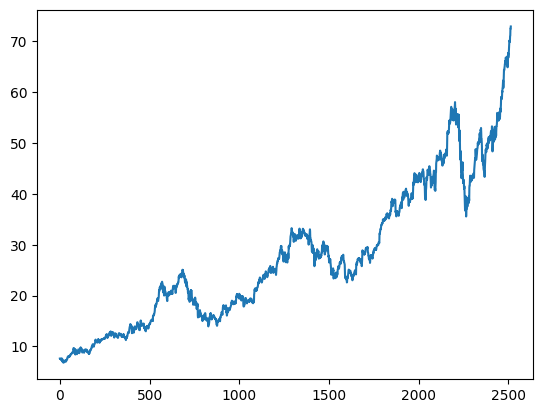

In [171]:
plt.plot(df.Close)


In [172]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [173]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

In [174]:
ma20=df.Close.rolling(20).mean()
ma50=df.Close.rolling(50).mean()


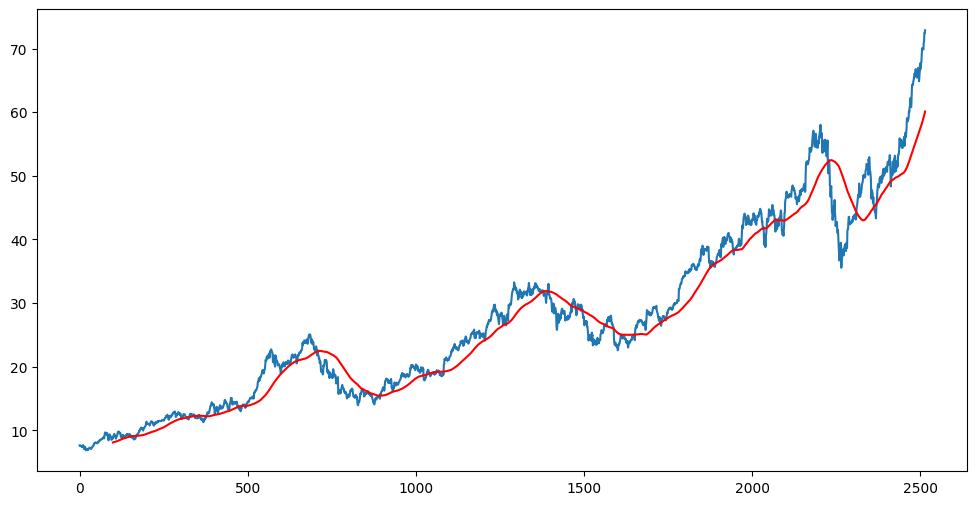

In [175]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

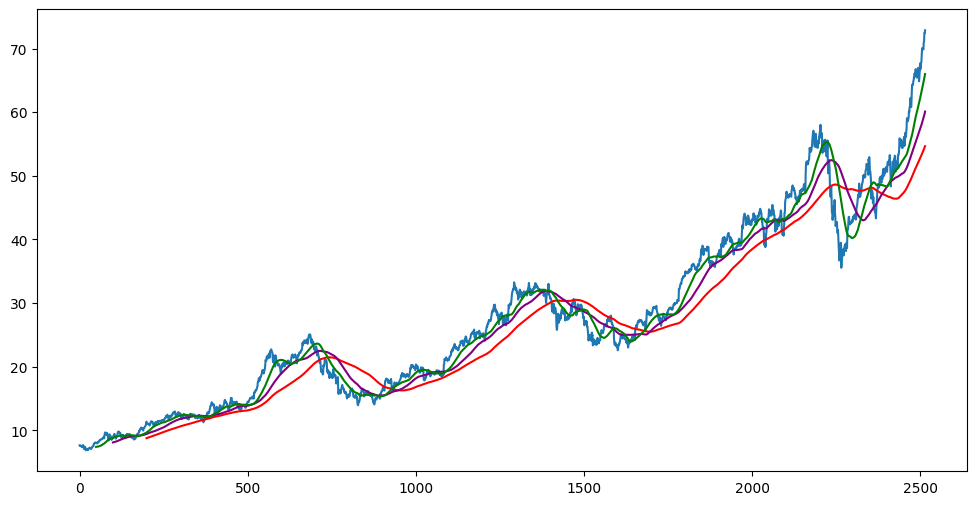

In [176]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'red')
plt.plot(ma100,'purple')
plt.plot(ma50,'green')


In [177]:
df.shape

(2515, 5)

In [178]:
#Splitting Data into training and testing
data_training = pd.DataFrame (df[ 'Close'][0: int(len(df)*0.70)]) 
data_testing = pd.DataFrame(df['Close'][ int(len (df)*0.70): int(len (df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [179]:
data_testing.head()


,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [180]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [182]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1760, 1)

In [183]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])





x_train,y_train=np.array(x_train),np.array(y_train)

# ML Model 

In [184]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [185]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [186]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_16 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_17 (LSTM)              (None, 120)              

In [187]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 299ms/step - loss: 0.0619
Epoch 2/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0124
Epoch 3/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0106
Epoch 4/50
52/52 [==============================] - 15s 295ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0107
Epoch 6/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0084
Epoch 7/50
52/52 [==============================] - 15s 295ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0084
Epoch 10/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0067
Epoch 13/50
5

In [188]:
model.save('keras_model.h5')

In [189]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [190]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [191]:
past_100_days=data_training.tail(100)

In [192]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [193]:
final_df.head

<bound method NDFrame.head of          Close
0    27.092501
1    27.202499
2    27.000000
3    26.982500
4    27.045000
..         ...
850  71.000000
851  71.067497
852  72.477501
853  72.449997
854  72.879997

[855 rows x 1 columns]>

In [194]:
input_data=scaler.fit_transform(final_df)

In [195]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [196]:
input_data.shape

(855, 1)

In [197]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [198]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


# Making Pedictions


In [199]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 2s 68ms/step


In [200]:
y_predicted.shape

(755, 1)

In [201]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [202]:
y_predicted

array([[0.06657207],
       [0.0674558 ],
       [0.06833461],
       [0.06918985],
       [0.07000646],
       [0.07077691],
       [0.07150647],
       [0.07221085],
       [0.0729067 ],
       [0.07361042],
       [0.07433033],
       [0.07506633],
       [0.07581949],
       [0.07658908],
       [0.07737029],
       [0.07815741],
       [0.07894437],
       [0.079724  ],
       [0.08050145],
       [0.08128515],
       [0.08208129],
       [0.0828899 ],
       [0.08370484],
       [0.08457349],
       [0.08555178],
       [0.08669074],
       [0.08803549],
       [0.08962312],
       [0.09147611],
       [0.09360009],
       [0.09598026],
       [0.09861007],
       [0.10148668],
       [0.10460033],
       [0.1079289 ],
       [0.11143583],
       [0.11509123],
       [0.11887708],
       [0.12275422],
       [0.12667885],
       [0.13060278],
       [0.13447598],
       [0.13829021],
       [0.14203298],
       [0.14569831],
       [0.14927034],
       [0.15272962],
       [0.156

In [203]:
a=scaler.scale_[0]
scale_factor=1/a
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

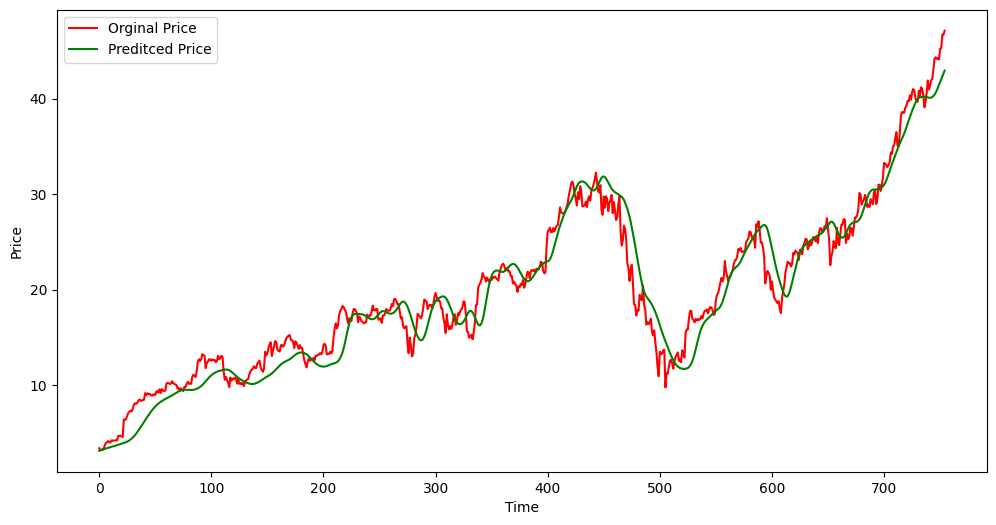

In [204]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'r',label='Orginal Price')
plt.plot(y_predicted,'g',label='Preditced Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()